# Documentation for Researcher, Date: 17/07/2020

### How to write Equations ? 

### Schrodinger Equation
In 1926, Erwin Schrodinger advanced the famous wave equation that relates the energy of a system to its wave properties. Because its application to the hydrogen atom is rather complicated, we shall first use wave equation to solve the particle-in-a-box. The Schrodinger Wave equation expressing in 1D is

\begin{equation*}
\frac {\partial^2 \varphi}{\partial x^2} +  \frac{ 8\pi^2 m}{ h^2} (E-V) \varphi = 0
\end{equation*}


   
where, 
* $\varphi$ - wave function or eigenfunction
* x - coordinate in space *
* m - mass 
* h - plank's constant
* V - potential energy

## How to plot graph ?

<IPython.core.display.Javascript object>


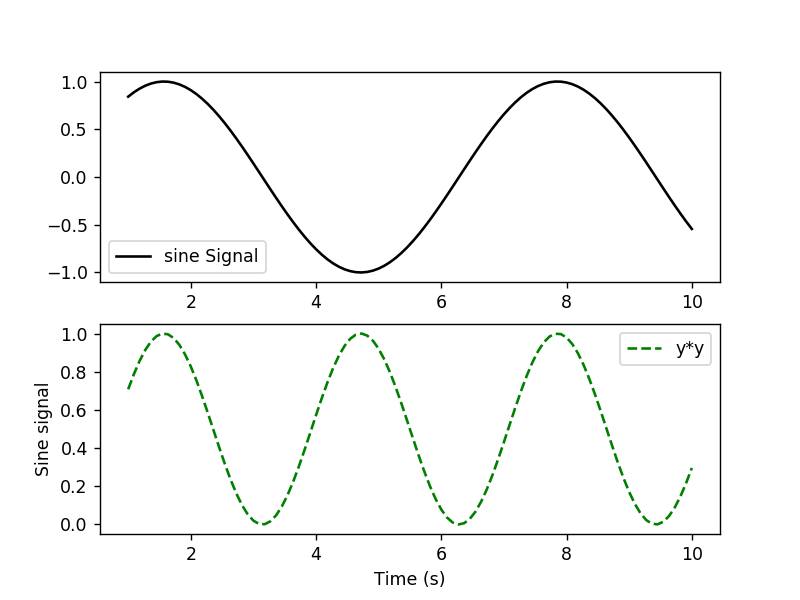

In [22]:
#calling this functions 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
%matplotlib notebook

#plotting graphs

x=np.linspace(1,10,100)
y=np.sin(x)
fig,ax=plt.subplots(2)
ax[0].plot(x,y,'-k',label='sine Signal')
ax[0].legend()
ax[1].plot(x,y**2,'--g',label='y*y')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Sine signal')
ax[1].legend()


### Add inset in the plot

<IPython.core.display.Javascript object>


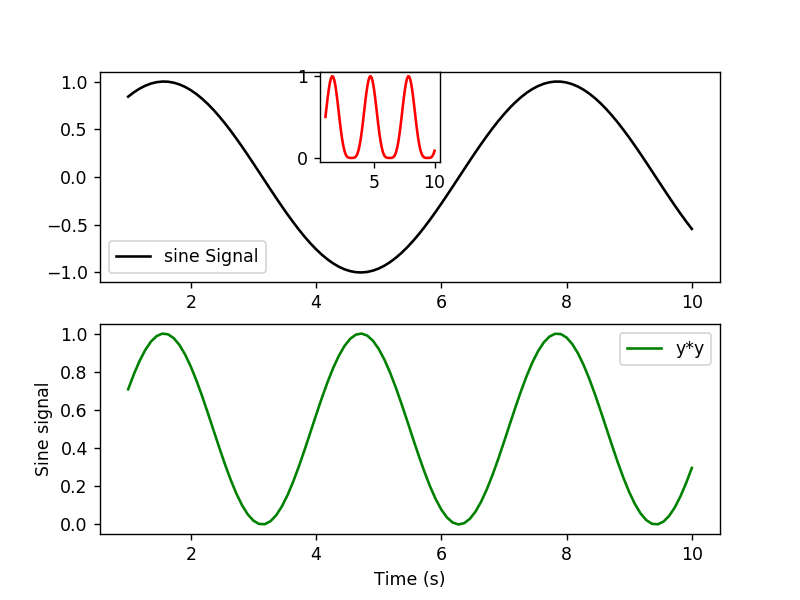

In [23]:
left, bottom, width, height = [0.4, 0.73, 0.15, 0.15]

fig,ax=plt.subplots(2)
ax[0].plot(x,y,'-k',label='sine Signal')
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,y**4,'-r')
ax[0].legend()

ax[1].plot(x,y**2,'-g',label='y*y')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Sine signal')
ax[1].legend()

### How to load the data('.txt', '.csv') files ?

In [4]:
import pandas as pd
A=np.loadtxt('C:/Users/vijay/w2.txt')
df=pd.DataFrame(A)
df.columns =  ['Time (s)','Weight (mg)']
df[0:20].style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})

,Time (s),Weight (mg)
0,1.271,227.156
1,1.371,227.193
2,1.471,227.232
3,1.571,227.27
4,1.671,227.308
5,1.771,227.346
6,1.871,227.384
7,1.971,227.422
8,2.071,227.46
9,2.171,227.498


### How to do fitting the data with equation ?

Consider x-axis  is time and y-axis is weight and the graph is plotted as given below, 

<IPython.core.display.Javascript object>


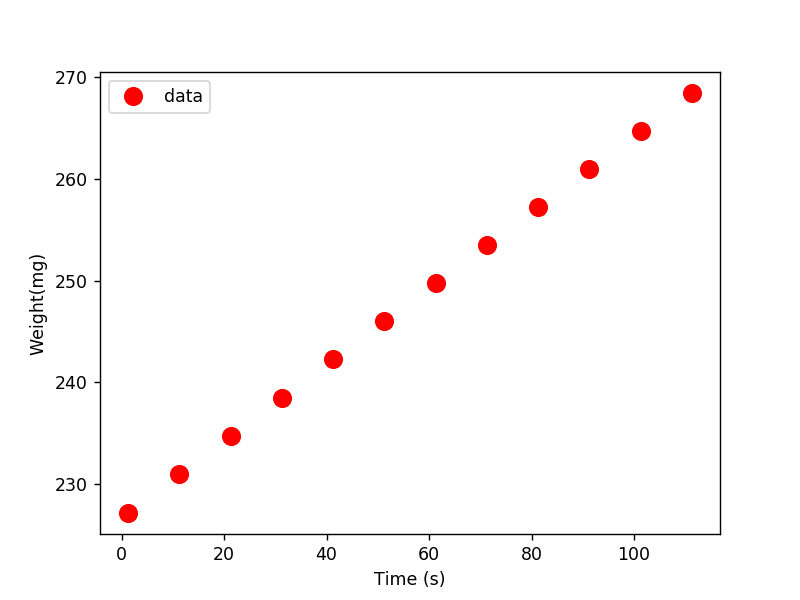

In [24]:
A=np.loadtxt('C:/Users/vijay/w2.txt')
Time=A[:,0]
Weight=A[:,1]

fig,ax=plt.subplots(1)
ax.plot(Time[::100],Weight[::100],'or',label='data',markersize='10')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Weight(mg)')
ax.legend()

### Fitting the graph with stright line $y=ax+b$

In [6]:
from scipy.optimize import curve_fit

def line(a, b, x):
    return a * x + b

popt, pcov = curve_fit(line, Time, Weight)
pfit = line(Time,*popt)

<IPython.core.display.Javascript object>


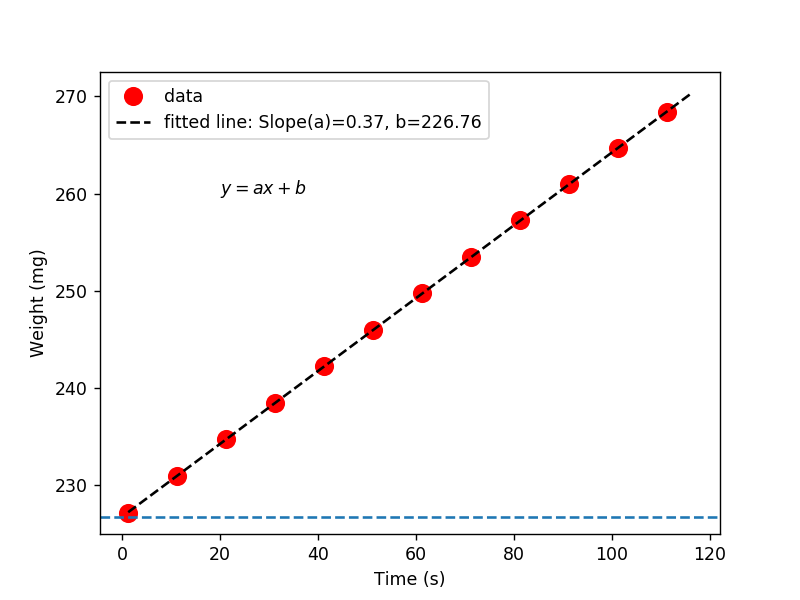

In [25]:
fig,ax=plt.subplots(1)
ax.plot(Time[::100],Weight[::100],'or',label='data',markersize='10')
ax.plot(Time[::50],pfit[::50],'--k',label='fitted line: Slope(a)='+ '%0.2f'%popt[1]+', b='+'%0.2f'%popt[0])
ax.axhline(y=226.76,linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Weight (mg)')
ax.text(20,260,r'$y=ax+b$')
ax.legend()

### How to add errorbar in the graph ?

<IPython.core.display.Javascript object>


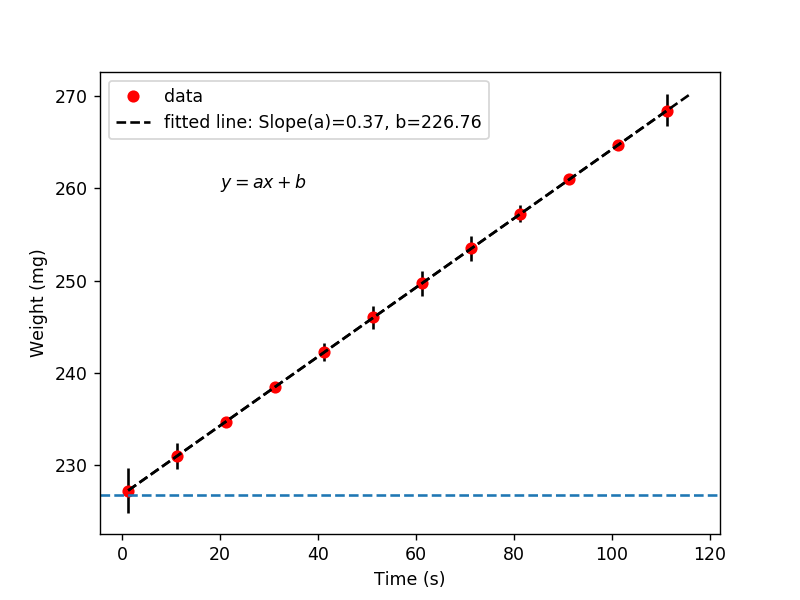

In [26]:
yerr=Weight-pfit
fig,ax=plt.subplots(1)
ax.plot(Time[::100],Weight[::100],'or',label='data')
ax.plot(Time[::50],pfit[::50],'--k',label='fitted line: Slope(a)='+ '%0.2f'%popt[1]+', b='+'%0.2f'%popt[0])
ax.errorbar(Time[::100],pfit[::100],yerr=yerr[::100]*30, fmt='--k',capthick=50)
ax.axhline(y=226.76,linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Weight (mg)')
ax.text(20,260,r'$y=ax+b$')
ax.legend()

### Lorentzian fitting

<IPython.core.display.Javascript object>


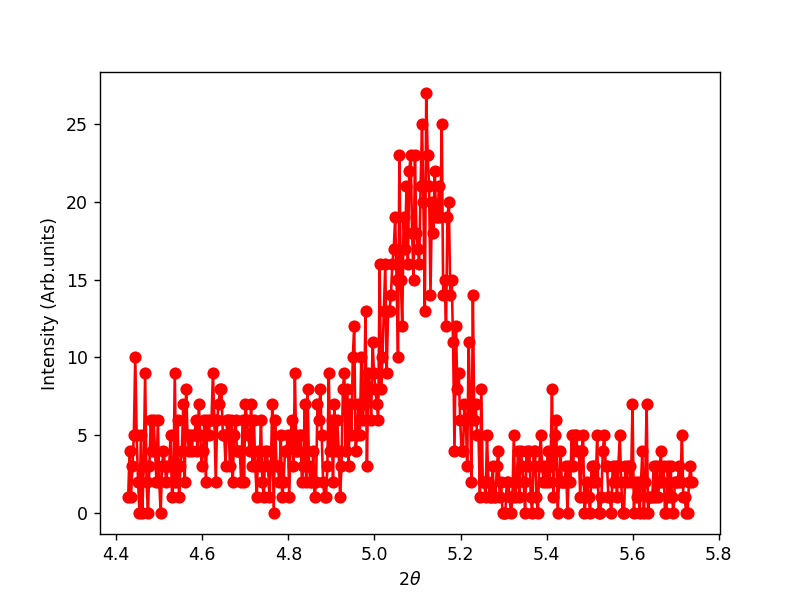

Text(0, 0.5, 'Intensity (Arb.units)')

In [27]:
B=np.loadtxt('C:/Users/vijay/xray.txt')
theta=B[:,0]
Intensity=B[:,1]
fig,ax=plt.subplots(1)
ax.plot(theta[800:1200],Intensity[800:1200],'-or')
ax.set_xlabel(r'$2\theta$')
ax.set_ylabel('Intensity (Arb.units)')

In [10]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)
popt1, pcov1 = curve_fit(lorentzian, theta[800:1200], Intensity[800:1200])
pfit1 = lorentzian(theta[800:1200],*popt1)

<IPython.core.display.Javascript object>


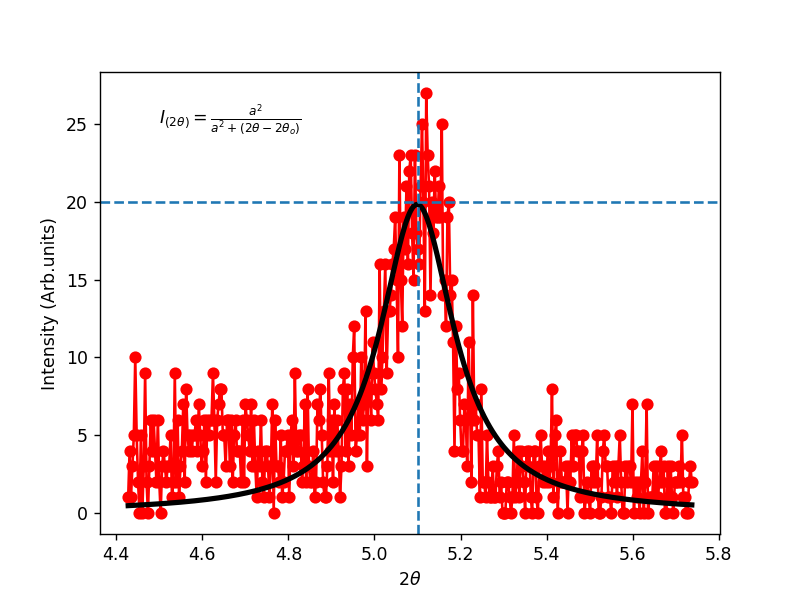

In [28]:
fig,ax=plt.subplots(1)
ax.plot(theta[800:1200],Intensity[800:1200],'-or')
ax.plot(theta[800:1200],pfit1,'-k',linewidth=3 )
ax.set_xlabel(r'$2\theta$')
ax.set_ylabel('Intensity (Arb.units)')
ax.text(4.5,25,r'$I_{(2\theta)}=\frac{a^{2}}{a^{2}+(2\theta-2\theta_o)}$')
ax.axhline(y=20,linestyle='--')
ax.axvline(x=5.1,linestyle='--')


### How can I fit a gaussian curve in python?

<IPython.core.display.Javascript object>


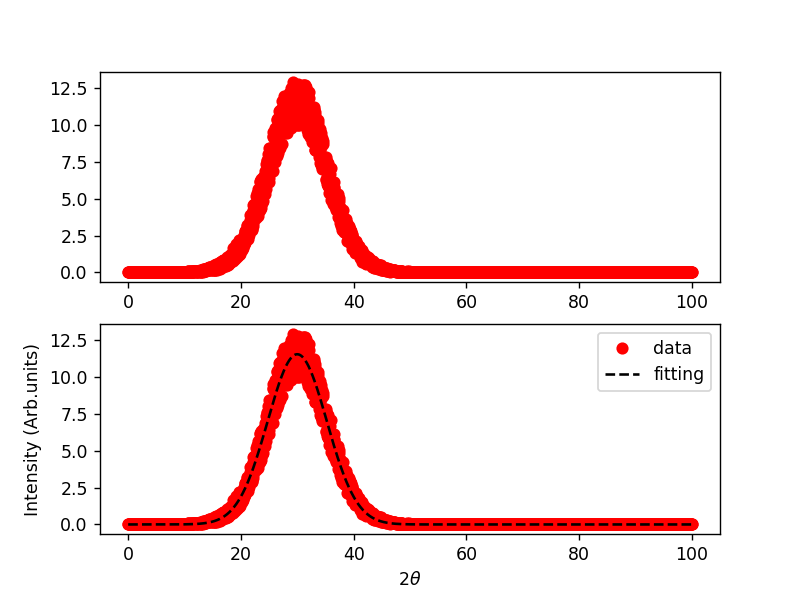

Text(0, 0.5, 'Intensity (Arb.units)')

In [55]:
import numpy as np
from astropy import modeling
from scipy import optimize

m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
x = np.linspace(0, 100, 2000)
data = m(x)
data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
data -= data.min()
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, data)

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

popt, _ = optimize.curve_fit(gaussian, x, data)

fig,ax=plt.subplots(2)
ax[0].plot(x, data,'or',label='data')

ax[1].plot(x, data,'or',label='data')
#ax[1].plot(x, fitted_model(x),'--k')
ax[1].plot(x, gaussian(x, *popt),'--k',label='fitting')
ax[1].legend()
ax[1].set_xlabel(r'$2\theta$')
ax[1].set_ylabel('Intensity (Arb.units)')

### How to load the image ?

<IPython.core.display.Javascript object>


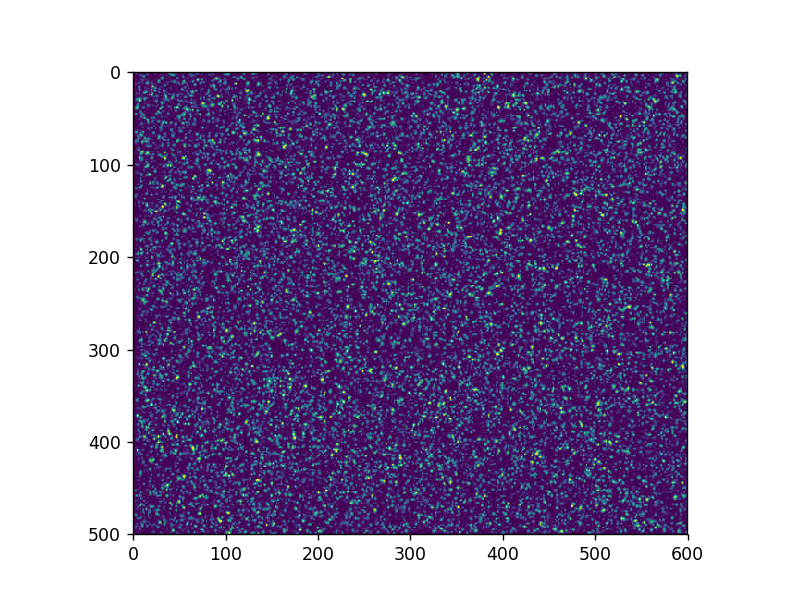

In [29]:
img=plt.imread('E:/a/vijay_Matlab codes-20190731T170427Z-001/vijay_Matlab codes/Examples/synthetic00018.jpg')
fig,ax=plt.subplots(1)
ax.imshow(img)

### Particle Image Velocimetry

In [13]:
from openpiv import tools, process, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio

C:\Users\vijay\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [14]:
frame_a  = tools.imread( 'E:/a/vijay_Matlab codes-20190731T170427Z-001/vijay_Matlab codes/Examples/synthetic00018.jpg' )
frame_b  = tools.imread( 'E:/a/vijay_Matlab codes-20190731T170427Z-001/vijay_Matlab codes/Examples/synthetic00020.jpg' )

<IPython.core.display.Javascript object>


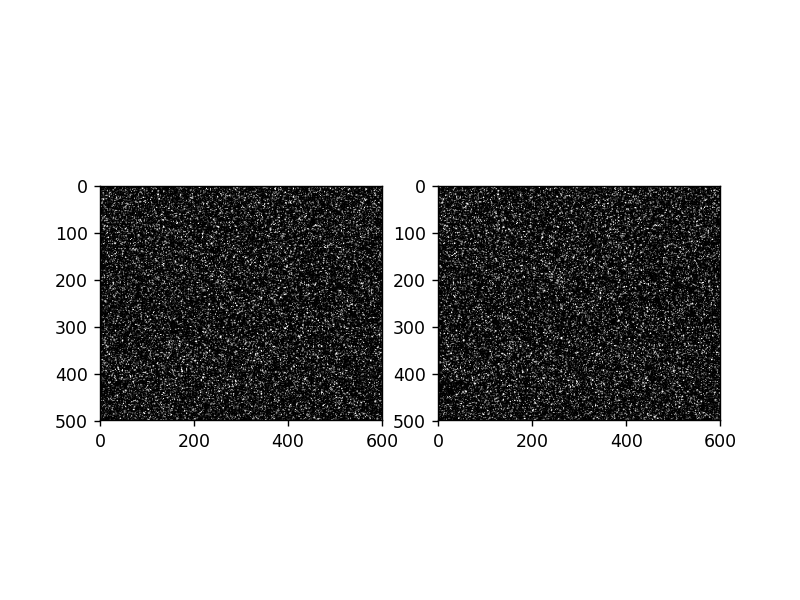

In [40]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [16]:
winsize = 64 # pixels
searchsize = 64  # pixels, search in image B
overlap = 36 # pixels
dt = 0.02 # sec


u0, v0, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )


In [17]:
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )
u1, v1, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.3 )
u2, v2 = filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)
x, y, u3, v3 = scaling.uniform(x, y, u2, v2, scaling_factor = 96.52 )
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )

<IPython.core.display.Javascript object>


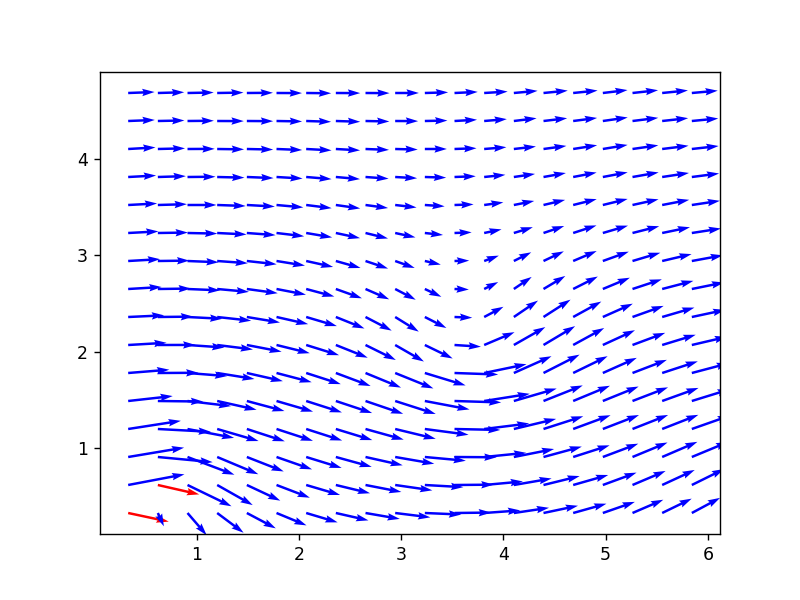

In [41]:
tools.display_vector_field('exp1_001.txt', scale=50, width=0.004)



### How to compute FFT of  a signal ?

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


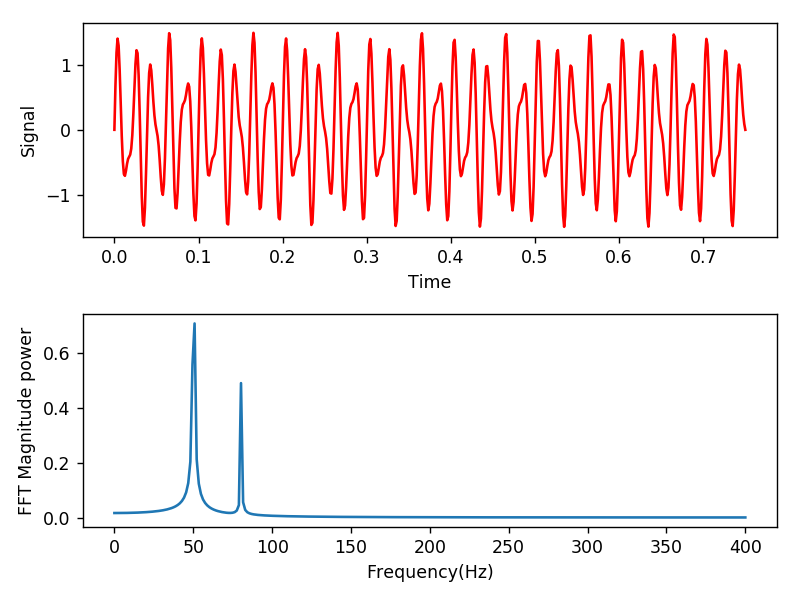

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots(2)
ax[0].plot(x, y,'-r')
ax[0].set_ylabel('Signal')
ax[0].set_xlabel('Time')
ax[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax[1].set_ylabel('FFT Magnitude power')
ax[1].set_xlabel('Frequency(Hz)')
plt.tight_layout()
plt.show()